In [111]:
import yfinance as yf
import pandas as pd
import requests as rq
import finviz as fz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as plk

In [17]:
aux = pd.read_csv("sp-100-index-07-02-2020.csv")
simbols = aux.Symbol.values

In [106]:
stock = {}
for simbol in simbols:
    try:
        insider_info = fz.get_insider(simbol)
    except: next
   
    hist = msft.history(period="1y")
    aux = hist.index
    hist.index = np.array(["2019-" + x[5:] for x in hist.index.astype(str)]).astype('datetime64[ns]')
    insider_data = pd.DataFrame(insider_info)
    print(insider_data.Transaction.unique())
    insider_data.Date = insider_data.Date.apply(lambda x: "2019 " + str(x) ).astype('datetime64[ns]')
    hist['insider'] = hist.index.isin(insider_data.Date)
    hist = hist.reset_index()
    stock[simbol]  = hist.drop(columns="index").set_index(aux)
    

['Sale' 'Option Exercise']
['Sale' 'Buy']
['Sale' 'Option Exercise']
['Sale']
['Sale' 'Option Exercise']
['Buy' 'Option Exercise' 'Sale']
['Option Exercise' 'Sale']
['Option Exercise' 'Sale']
['Sale' 'Option Exercise']
['Buy' 'Sale' 'Option Exercise']
['Buy' 'Sale' 'Option Exercise']
['Option Exercise']
['Buy' 'Option Exercise' 'Sale']
['Option Exercise' 'Sale']
['Sale' 'Option Exercise' 'Buy']
['Sale' 'Option Exercise' 'Buy']
['Sale']
['Option Exercise' 'Buy' 'Sale']
['Option Exercise' 'Buy' 'Sale']
['Option Exercise' 'Buy' 'Sale']
['Sale' 'Option Exercise']
['Sale' 'Option Exercise']
['Option Exercise' 'Sale']
['Sale' 'Option Exercise']
['Option Exercise' 'Sale']
['Buy' 'Option Exercise' 'Sale']
['Sale']
['Option Exercise' 'Sale']
['Sale']
['Sale' 'Buy' 'Option Exercise']
['Option Exercise' 'Buy' 'Sale']
['Option Exercise' 'Buy' 'Sale']
['Buy' 'Option Exercise' 'Sale']
['Sale' 'Option Exercise']
['Option Exercise' 'Buy' 'Sale']
['Sale' 'Option Exercise']
['Sale' 'Option Exercise' 'Bu

In [113]:
with open('one_year_stock_insider.pkl', 'wb') as handle:
    plk.dump(stock, handle, protocol=plk.HIGHEST_PROTOCOL)

In [68]:
msft = yf.Ticker("ORCL")
hist = msft.history(period="1y")

In [100]:
stock["ORCL"]["Feat_1_relative_change"]= (stock["ORCL"].High - stock["ORCL"].Low)/stock["ORCL"].Open

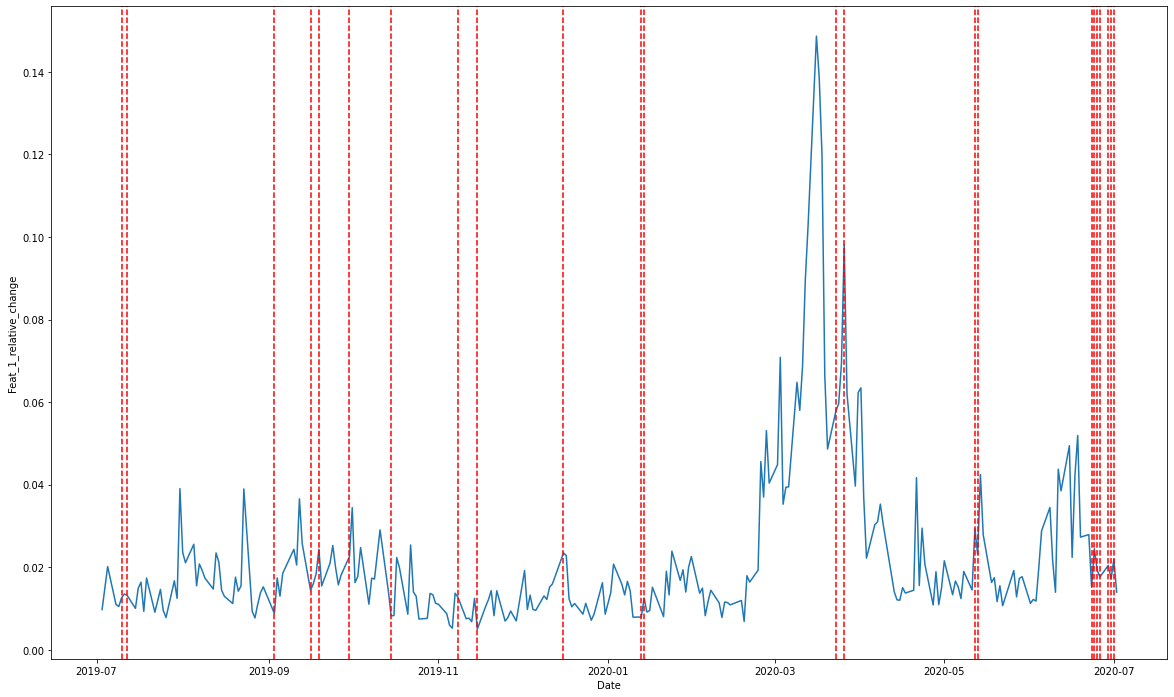

In [101]:
a4_dims=(20,12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(ax = ax, x=stock["ORCL"].index, y="Feat_1_relative_change",  data=stock["ORCL"])
for date in stock["ORCL"].index[stock["ORCL"].insider]:
    ax.axvline(date, color="red", linestyle="--")

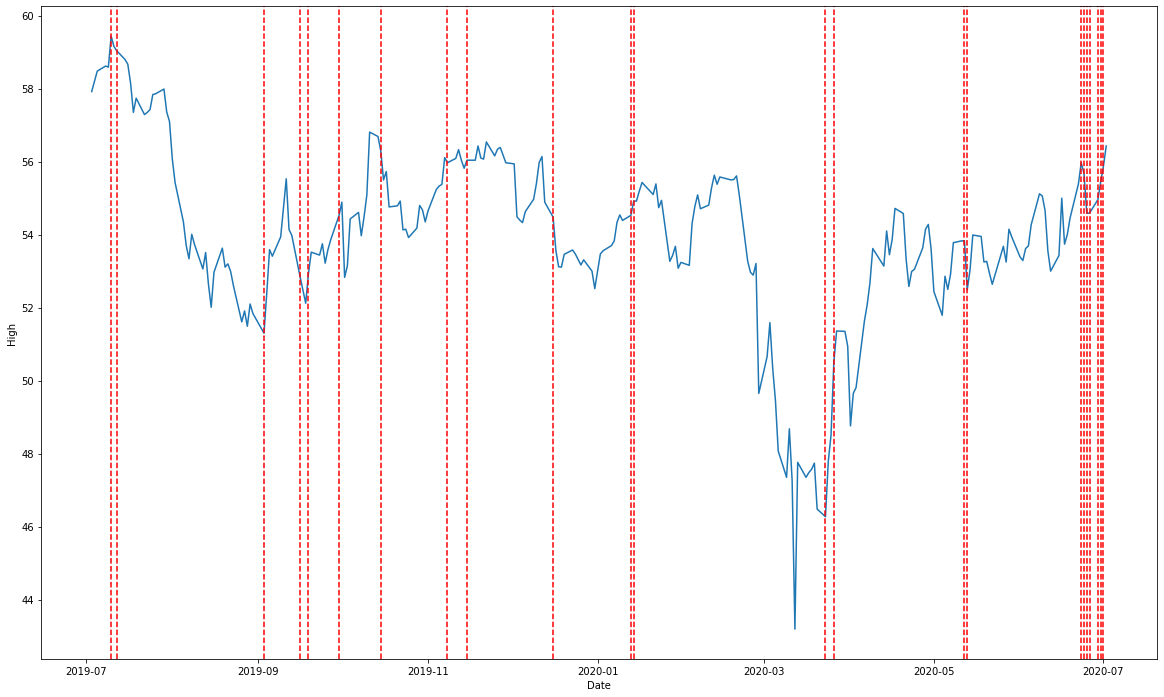

In [98]:
a4_dims=(20,12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(ax = ax, x=stock["ORCL"].index, y="High",  data=stock["ORCL"])
for date in stock["ORCL"].index[stock["ORCL"].insider]:
    ax.axvline(date, color="red", linestyle="--")

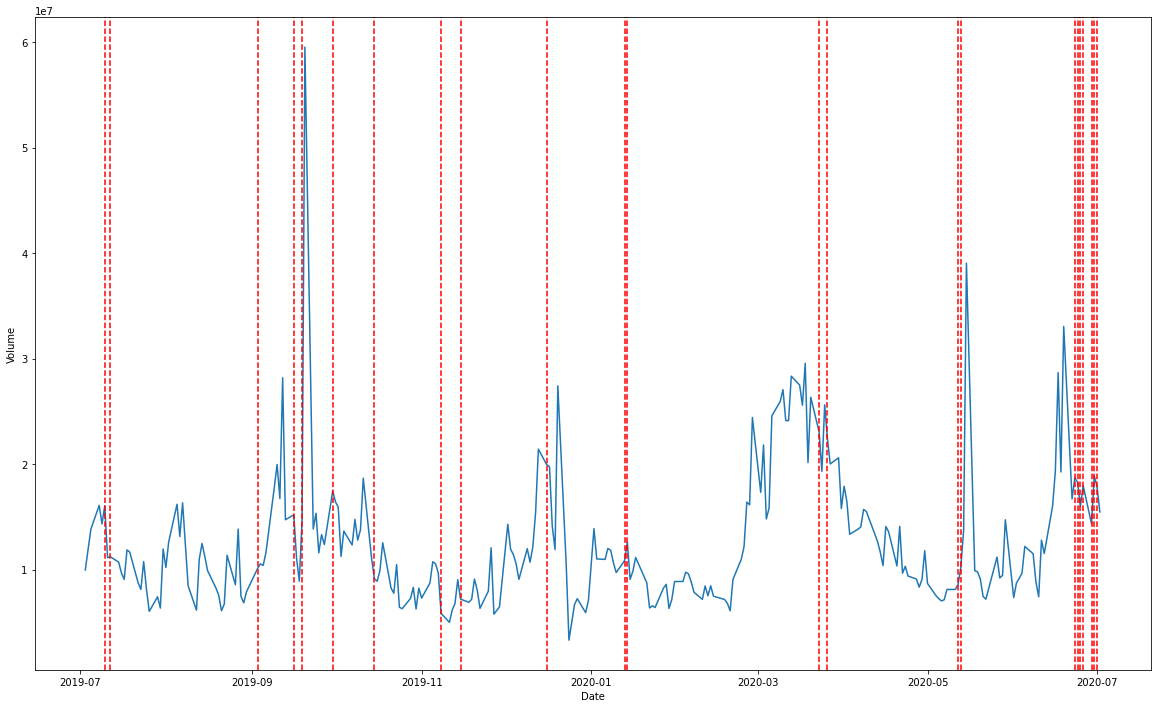

In [99]:
a4_dims=(20,12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(ax = ax, x=stock["ORCL"].index, y="Volume",  data=stock["ORCL"])
for date in stock["ORCL"].index[stock["ORCL"].insider]:
    ax.axvline(date, color="red", linestyle="--")

In [102]:
simbols

array(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT',
       'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY',
       'BRK.B', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST',
       'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK',
       'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG',
       'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC',
       'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT',
       'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE',
       'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM',
       'RTX', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TXN', 'UNH',
       'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM',
       'Downloaded from Barchart.com as of 07-02-2020 01:06pm CDT'],
      dtype=object)

In [105]:
insider_info = fz.get_insider("KHC")
insider_data = pd.DataFrame(insider_info)

In [104]:
insider_data

,Insider Trading,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4
0,HASTINGS REED,CEO,Jun 22,Option Exercise,14.55,"57,260","833,379","57,260",Jun 23 08:31 PM
1,HASTINGS REED,CEO,Jun 22,Sale,462.40,"57,260","26,476,829",0,Jun 23 08:31 PM
2,HASTINGS REED,CEO,May 20,Option Exercise,15.67,"53,193","833,306","53,193",May 21 05:49 PM
3,HASTINGS REED,CEO,May 20,Sale,449.23,"53,193","23,895,924",0,May 21 05:49 PM
4,Peters Gregory K,Chief Product Officer,May 14,Option Exercise,105.79,"5,366","567,669","18,456",May 15 06:15 PM
5,Sweeney Anne M,Director,May 14,Option Exercise,153.01,"1,500","229,522",426,May 15 06:15 PM
6,Sweeney Anne M,Director,May 14,Sale,450.00,"1,500","675,000",0,May 15 06:15 PM
7,Peters Gregory K,Chief Product Officer,May 14,Sale,450.00,"5,366","2,414,700","13,090",May 15 06:15 PM
8,HOAG JAY C,Director,Apr 24,Sale,418.64,"3,789","1,586,210",0,Apr 27 06:50 PM
9,HASTINGS REED,CEO,Apr 20,Option Exercise,15.33,"54,369","833,319","54,369",Apr 21 06:53 PM


In [77]:
stock["AAPL"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,insider
Date,,,,,,,,
1980-12-12,0.41,0.41,0.41,0.41,117258400,0.0,0.0,False
1980-12-15,0.39,0.39,0.38,0.38,43971200,0.0,0.0,False
1980-12-16,0.36,0.36,0.36,0.36,26432000,0.0,0.0,False
1980-12-17,0.37,0.37,0.37,0.37,21610400,0.0,0.0,False
1980-12-18,0.38,0.38,0.38,0.38,18362400,0.0,0.0,False
...,...,...,...,...,...,...,...,...
2020-06-26,364.41,365.32,353.02,353.63,51314200,0.0,0.0,False
2020-06-29,353.25,362.17,351.28,361.78,32661500,0.0,0.0,False
2020-06-30,360.08,365.98,360.00,364.80,35055800,0.0,0.0,False


In [10]:
msft.major_holders

,0,1
0,1.42%,% of Shares Held by All Insider
1,74.09%,% of Shares Held by Institutions
2,75.16%,% of Float Held by Institutions
3,4630,Number of Institutions Holding Shares


In [14]:
a = rq.get("http://api.marketstack.com/v1/eod?access_key=d2f5b6bf5ee7e1352c04625c39bf878a&symbols=AAPL")

In [15]:
a

<Response [200]>

In [16]:
type(a)

requests.models.Response

In [17]:
a.content

b'{"pagination":{"limit":100,"offset":0,"count":100,"total":253},"data":[{"open":365.12,"high":367.36,"low":363.91,"close":364.11,"volume":27263209.0,"adj_high":367.36,"adj_low":363.91,"adj_close":364.11,"adj_open":365.12,"adj_volume":27263209.0,"symbol":"AAPL","exchange":"XNAS","date":"2020-07-01T00:00:00+0000"},{"open":360.08,"high":365.98,"low":360.0,"close":364.8,"volume":35055821.0,"adj_high":365.98,"adj_low":360.0,"adj_close":364.8,"adj_open":360.08,"adj_volume":35055821.0,"symbol":"AAPL","exchange":"XNAS","date":"2020-06-30T00:00:00+0000"},{"open":353.25,"high":362.1736,"low":351.28,"close":361.78,"volume":32661519.0,"adj_high":362.1736,"adj_low":351.28,"adj_close":361.78,"adj_open":353.25,"adj_volume":32661519.0,"symbol":"AAPL","exchange":"XNAS","date":"2020-06-29T00:00:00+0000"},{"open":364.41,"high":365.32,"low":353.02,"close":353.63,"volume":51314211.0,"adj_high":365.32,"adj_low":353.02,"adj_close":353.63,"adj_open":364.41,"adj_volume":51314211.0,"symbol":"AAPL","exchange":"

In [19]:
a.headers

{'Date': 'Thu, 02 Jul 2020 15:04:20 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d4e442b447fb14654801f7a826f3f973d1593702259; expires=Sat, 01-Aug-20 15:04:19 GMT; path=/; domain=.marketstack.com; HttpOnly; SameSite=Lax', 'cache-control': 'no-cache, private', 'x-request-time': '0.138, 0.399', 'x-apilayer-transaction-id': '16d5665e-83da-491d-a23f-20f6b30c2cea', 'access-control-allow-origin': '*', 'access-control-allow-methods': 'GET, POST, HEAD, OPTIONS', 'access-control-allow-headers': '*', 'x-quota-limit': '1000', 'x-quota-remaining': '999', 'x-increment-usage': '1', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '03b1a7b4280000b8cf8f132200000001', 'Server': 'cloudflare', 'CF-RAY': '5ac942337a9bb8cf-MIA', 'Content-Encoding': 'gzip'}